# 3. Hallucinations of models

In [1]:
import json
import numpy as np
import pandas as pd
from collections import defaultdict
from common import load_preds_ids, display_histogram

# Amount of undetermined ids per year

In [2]:
models_paths = {
    "Semantic Scholar": "current_methods/search_engines/preds/semantic_scholar",
    "Google Scholar": "current_methods/search_engines/preds/google_scholar",
    "GPT-4o": "current_methods/instructs_models/preds/gpt-4o",
    "GPT-4o (JSON mode)": "current_methods/instructs_models/preds/gpt-4o_json",
    "GPT-4o-2024-08-06": "current_methods/instructs_models/preds/gpt-4o-2024-08-06",
    "GPT-4o-2024-08-06 (JSON mode)": "current_methods/instructs_models/preds/gpt-4o-2024-08-06_json",
    "GPT-4o-2024-08-06 (Structured Output)": "current_methods/instructs_models/preds/gpt-4o-2024-08-06_structured_output",
    "Gemini 1.5 flash": "current_methods/instructs_models/preds/gemini-1.5-flash",
    "Gemini 1.5 flash (JSON mode)": "current_methods/instructs_models/preds/gemini-1.5-flash_json"
}

preds_ids = [load_preds_ids(path) for path in models_paths.values()]

In [3]:
def mean_year(preds, year):    
    return np.mean([(len([v for v in vs if v])/len(vs) if len(vs) else 1) for k, vs in preds.items() if str(year) in k])

def mean_match_ids(keys, preds, years=[2020, 2021, 2022, 2023, 2024]):
    scores = {k: {} for k in years}
    for year in years:
            for i, key in enumerate(keys):
                    scores[year][key] = np.mean([mean_year(preds[i][f"A{annotator_i}"], year) for annotator_i in [1,2,3]])
    return json.loads(json.dumps(scores))

def format_to_df(mean_match, keys, years = [2020, 2021, 2022, 2023, 2024]):
    data = defaultdict(list)
    data["year"] = years
    for method in keys:
        for year in years:
            data[method].append(mean_match[str(year)][method])
    return pd.DataFrame(data)

In [4]:
mean_match = mean_match_ids(models_paths.keys(), preds_ids); mean_match

{'2020': {'Semantic Scholar': 1.0,
  'Google Scholar': 0.9380174291938997,
  'GPT-4o': 0.674506815733686,
  'GPT-4o (JSON mode)': 0.44313725490196076,
  'GPT-4o-2024-08-06': 0.588235968622055,
  'GPT-4o-2024-08-06 (JSON mode)': 0.356656346749226,
  'GPT-4o-2024-08-06 (Structured Output)': 0.31764705882352945,
  'Gemini 1.5 flash': 0.27758184368091493,
  'Gemini 1.5 flash (JSON mode)': 0.628024790927723},
 '2021': {'Semantic Scholar': 1.0,
  'Google Scholar': 0.975438596491228,
  'GPT-4o': 0.6133356904804681,
  'GPT-4o (JSON mode)': 0.39210526315789473,
  'GPT-4o-2024-08-06': 0.5985297732038811,
  'GPT-4o-2024-08-06 (JSON mode)': 0.37543859649122807,
  'GPT-4o-2024-08-06 (Structured Output)': 0.3315789473684211,
  'Gemini 1.5 flash': 0.31591905460245046,
  'Gemini 1.5 flash (JSON mode)': 0.6648517931473772},
 '2022': {'Semantic Scholar': 1.0,
  'Google Scholar': 0.9561403508771931,
  'GPT-4o': 0.6353829299446051,
  'GPT-4o (JSON mode)': 0.4745614035087719,
  'GPT-4o-2024-08-06': 0.61349

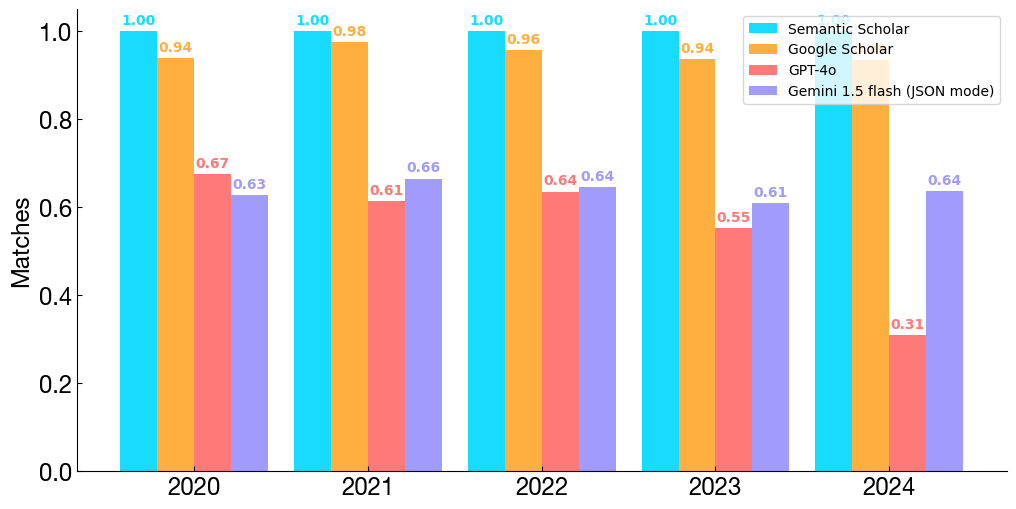

In [5]:
df = format_to_df(mean_match, ["Semantic Scholar", "Google Scholar", "GPT-4o", "Gemini 1.5 flash (JSON mode)"])
display_histogram(df, ylabel="Matches")

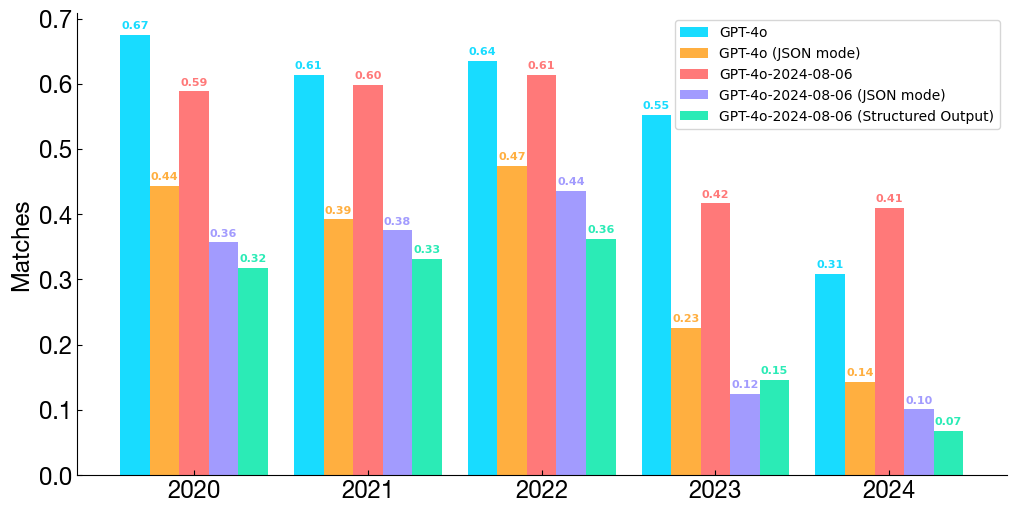

In [6]:
df = format_to_df(mean_match, ["GPT-4o", "GPT-4o (JSON mode)", "GPT-4o-2024-08-06", "GPT-4o-2024-08-06 (JSON mode)", "GPT-4o-2024-08-06 (Structured Output)"])
display_histogram(df, ylabel="Matches")

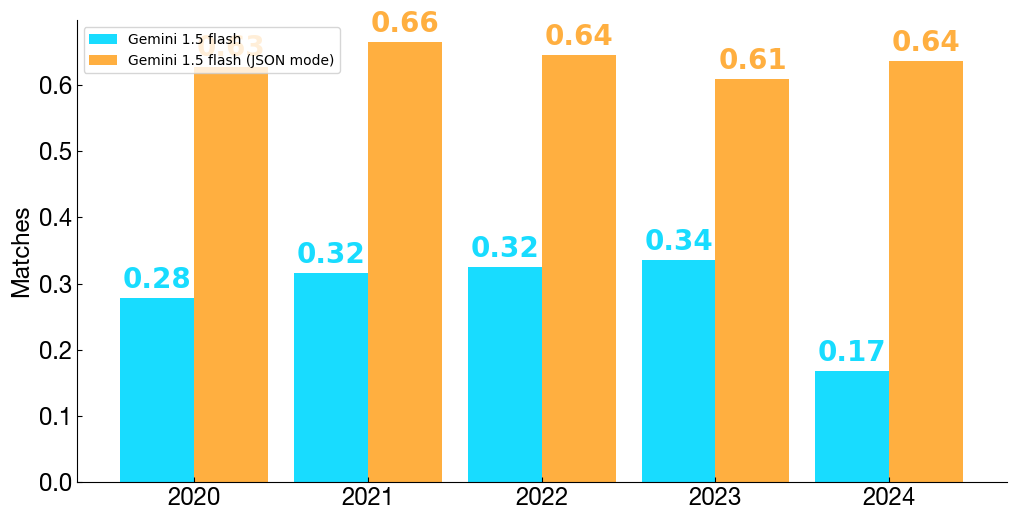

In [7]:
df = format_to_df(mean_match, ["Gemini 1.5 flash", "Gemini 1.5 flash (JSON mode)"])
display_histogram(df, ylabel="Matches")